<a href="https://colab.research.google.com/github/igooruh/analise-dados-airbnb/blob/main/Analisando_Dados_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.** (*Lembrando que dataset é uma versão resumida*)

## Obtenção dos Dados

O [Airbnb](https://www.airbnb.com.br) disponibiliza dados das principais cidades do mundo para que os mesmos possam utilizados para realização de insights. Sendo assim o conjunto de dados utilizado neste projeto de análise exploratória foi obtido na plataforma [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Será baixado o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Buenos Aires (good for visualisations).*

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um Dataframe
df = pd.read_csv('http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-12-24/visualisations/listings.csv')

## Análise de Dados

Objetivo: Conhecer mais sobre o dataset, permitindo assim ter o entendimento de como está estruturado o conjunto de dados.

**Dicionário das Variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - nome do bairro por grupo
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Mas antes de inciarmos a análise, vamos verificar como está o *dataset*, analisando as 5 primeiras entradas.

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,4998,2,26,2019-11-28,0.25,1,0
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,2249,1,20,2017-12-11,0.15,1,365
2,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2499,1,1,2018-12-18,0.04,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2499,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B pvt bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2499,1,10,2019-11-27,0.44,7,0


## Questão 1: Quantos atributos(variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos dos atributos?

Este dataframe é uma versão "resumida" do Airbnb, o mesmo possui **20636 entradas** e **16 variáveis**. Porém na plataforma há uma versão mais completa com **35847 entradas** e **106 variáveis**.

In [5]:
# Identificar o volume de dados do DataFrame
print('Entrada:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))

# Verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entrada:	 20636
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Questão 2: Qual a porcentagem de valores ausentes no dataset?

Os dados ausentes de um dataset está diretamente relacionada com a qualidade do mesmo, sendo assim um dataset tiver muitos dados ausentes em diferentes variáveis pode comprometer a análise dos dados. Por isso é impotante entender desde o início quais são os valores nulos e se são significativos comparados ao total de entradas.

* Notamos que ao ver a coluna `neigbourhood_group` que possui 100% dos valores faltantes. Sendo podemos tomar a decisão de remover a coluna para mantermos nosso dataframe limpo.

* As variáveis `reviews_per_mounth` e `last_review` possuem 30% dos valores nulos.

* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.300688
last_review                       0.300688
name                              0.000242
host_name                         0.000194
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## Limpeza de dados

Nessa fase será utilizado também técnicas para limpeza e estruturação dos dados.

Vamos começar realizando uma cópia do dataframe df, pois assim não perdemos os dados originais do nosso conjunto de informações.

In [7]:
# Realiza copia do dataframe df para o airbnb_df_copy
df_airbnb_clean_columns = df.copy()

Foi removido algumas colunas que não seriam utilizadas. Nesta análise não precisamos saber quem é o anfitrião ou nome da casa dos mesmo, podendo ser removidos para melhor a anaálise.

Os campos `id` e `host_id` foi removido, pois são indetificadores usados pelo banco de dados para que assim o mesmo possa performar melhor em encontrar os dados e seus ralacionamentos.

A coluna `name` e `host_name` pode ser removida, pois nesta análise não analisaremos os perfis de cada pessoa.

A coluna `neighbourhood_group` foi removida, pois a mesma não continha nenhum valor válido.

In [8]:
# Remove colunas não tão importante para análise exploratória
df_airbnb_clean_columns.drop(columns = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group'], inplace = True)

In [9]:
# Visualiza as 10 primeiras linhas da dataframe airbnb_df_copy
df_airbnb_clean_columns.head(10)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Palermo,-34.58184,-58.42415,Entire home/apt,4998,2,26,2019-11-28,0.25,1,0
1,Recoleta,-34.59761,-58.39468,Private room,2249,1,20,2017-12-11,0.15,1,365
2,Palermo,-34.59348,-58.42949,Private room,2499,1,1,2018-12-18,0.04,7,365
3,Palermo,-34.59348,-58.42949,Private room,2499,1,0,NaN,NaN,7,365
4,Palermo,-34.59348,-58.42949,Private room,2499,1,10,2019-11-27,0.44,7,0
5,Palermo,-34.59327,-58.42953,Private room,3332,1,0,NaN,NaN,7,365
6,Palermo,-34.59348,-58.42949,Private room,4165,1,1,2017-11-23,0.03,7,365
7,Palermo,-34.58777,-58.41106,Entire home/apt,2842,5,90,2020-03-01,0.87,3,363
8,Monserrat,-34.60913,-58.37372,Entire home/apt,9996,1,0,NaN,NaN,1,365
9,Nuñez,-34.53724,-58.46580,Private room,2499,29,0,NaN,NaN,1,365


## Questão 3: Qual o tipo de distribuição das variáveis?

Para verificar como está distribuído os dados usaremos o gráfico de histograma, para analisarmos as frequências das informações.

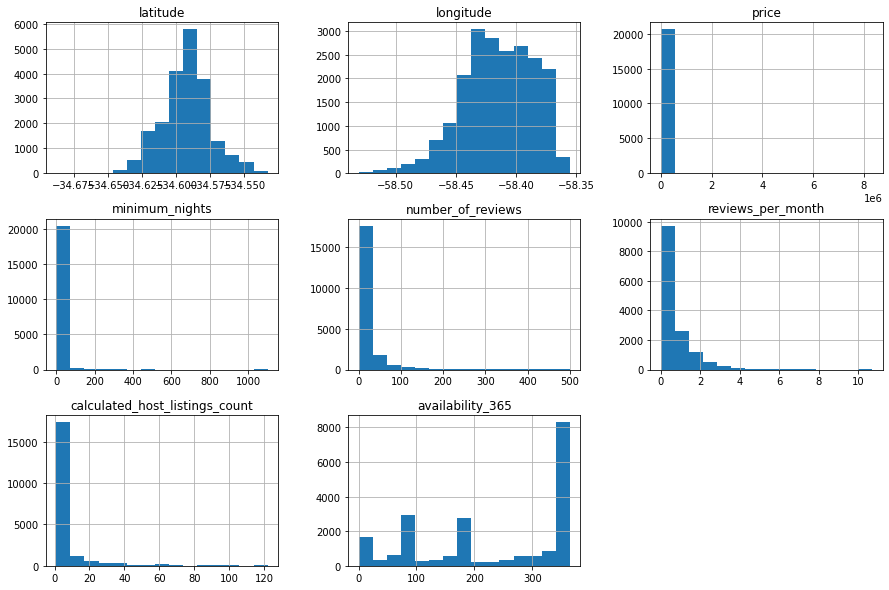

In [10]:
# Plotar histograma das variáveis
df_airbnb_clean_columns.hist(bins = 15, figsize = (15,10));

## Questão 4: Há *outliers* presentes?

Ao analisar a distribuição do histograma, é possível verificar que há indícios da presença de outliers. Exemplos de variáveis com valores que divergem `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma ditribuição, aucasionando distorção na representação gráfica. Para confirmar tal distorção, há duas maneiras de detectar os outliers.

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [11]:
# Ver o resumo estatístico das variáveis numéricas
df_airbnb_clean_columns[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.063600e+04,20636.000000,20636.000000,14431.000000,20636.000000,20636.000000
mean,4.820957e+03,6.441316,16.460845,0.699708,7.522873,231.519626
std,6.136472e+04,19.423860,33.570021,0.833883,17.278160,130.819993
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.583000e+03,2.000000,0.000000,0.140000,1.000000,90.000000
50%,2.499000e+03,3.000000,3.000000,0.390000,2.000000,267.500000
75%,3.998000e+03,5.000000,17.000000,0.955000,4.000000,364.000000
max,8.329659e+06,1100.000000,500.000000,10.710000,122.000000,365.000000


Observando o resumo acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 3.998000e+03, porém seu valor máximo é de 8.329659e+06
* A quantidade mínima de noites(`minimum_nights`) está acima de 365 dias no ano

## Boxplot para minimum_nights

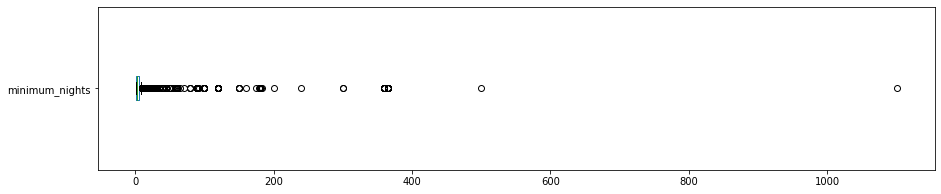

minimum_nights: Valores acima de 30 dias
339 entradas
1.6428%


In [12]:
# minimum_nights
df_airbnb_clean_columns.minimum_nights.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

# Ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: Valores acima de 30 dias')
print('{} entradas'.format(len(df_airbnb_clean_columns[df_airbnb_clean_columns.minimum_nights > 30])))
print('{:.4f}%'.format((len(df_airbnb_clean_columns[df_airbnb_clean_columns.minimum_nights > 30]) / df_airbnb_clean_columns.shape[0]) * 100))

## Boxplot para price

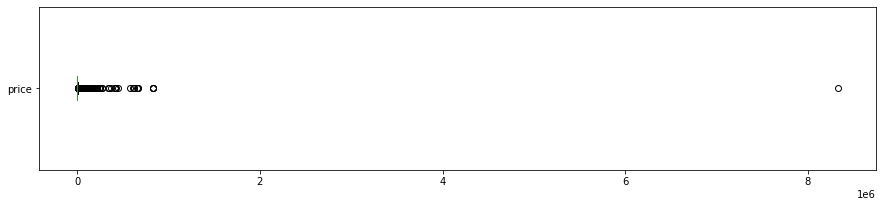


price: Valores acima de R$1500
15668 entradas
75.9256%


In [13]:
# price
df_airbnb_clean_columns.price.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

# Ver quantidade de valores acima de 1500 para price
print('\nprice: Valores acima de R$1500')
print('{} entradas'.format(len(df_airbnb_clean_columns[df_airbnb_clean_columns.price > 1500])))
print('{:.4f}%'.format((len(df_airbnb_clean_columns[df_airbnb_clean_columns.price > 1500]) / df_airbnb_clean_columns.shape[0]) * 100))

Histogramas sem *outliers*

Já identificamos os *outliers* nas variáveis `minimum_nights` e `price`, vamos limpar o *DataFrame* delas e plotar os histogramas novamente.

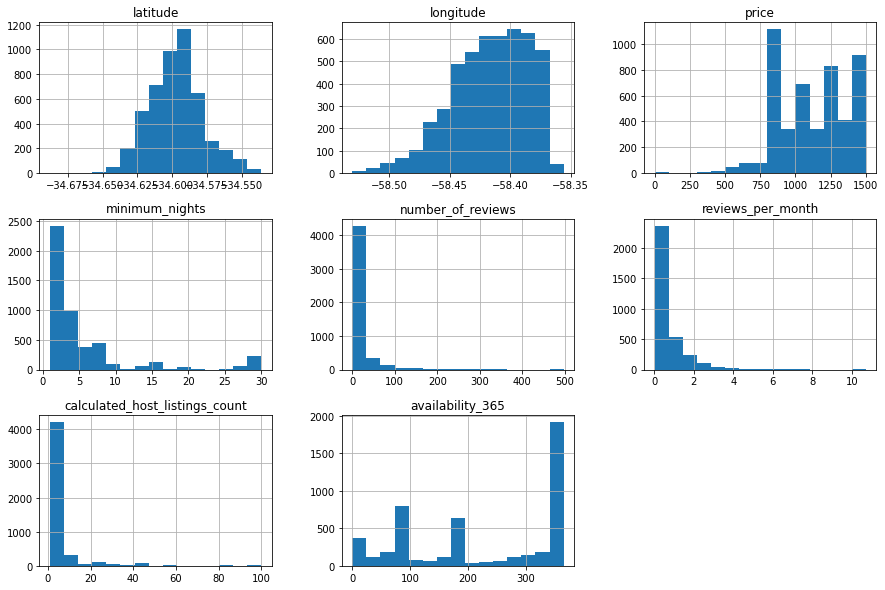

In [14]:
# Remover os outliers em um novo Dataframe
df_airbnb_clean_outliers = df_airbnb_clean_columns.copy()
df_airbnb_clean_outliers.drop(df_airbnb_clean_outliers[df_airbnb_clean_outliers.price > 1500].index, axis = 0, inplace = True)
df_airbnb_clean_outliers.drop(df_airbnb_clean_outliers[df_airbnb_clean_outliers.minimum_nights > 30].index, axis = 0, inplace = True)

# Plotar os histogramas para as variáveis numéricas
df_airbnb_clean_outliers.hist(bins = 15, figsize = (15, 10));

## Questão 5: Qual a correlação existente entre as variáveis

Correlação significa que existe uma relação entre duas coisas. No contexto que estamos trabalhando, buscamos relação ou semelhança entre duas variáveis.

A relação pode ser medida em função do coeficiente de correlação estabelecendo qual a intensidade dela.

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [15]:
# Criar uma matriz de correlação
corr = df_airbnb_clean_outliers[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.043975,0.095961,0.120992,0.078639,-0.025271
minimum_nights,0.043975,1.000000,-0.093460,-0.133563,0.211866,0.026526
number_of_reviews,0.095961,-0.093460,1.000000,0.767899,-0.015113,-0.030858
reviews_per_month,0.120992,-0.133563,0.767899,1.000000,0.011596,-0.128775
calculated_host_listings_count,0.078639,0.211866,-0.015113,0.011596,1.000000,0.001803
availability_365,-0.025271,0.026526,-0.030858,-0.128775,0.001803,1.000000


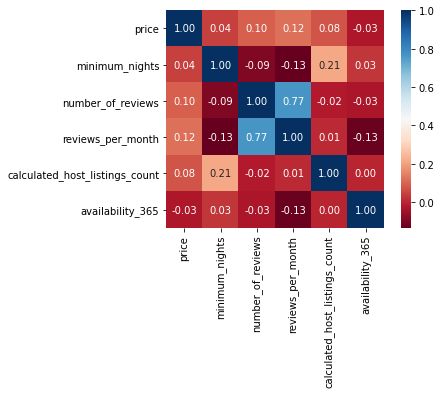

In [16]:
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

## Questão 6: Qual tipo de imóvel mais alugado no Airbnb?

A coluna da variável `roo_type` indica o tipo de locação que está anunciada no Airbnb. Sabe-se que na plataforma existe opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar as quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [17]:
# Mostrar a quantidade de cada tipo de imóvel disponível
df_airbnb_clean_outliers.room_type.value_counts()

Private room       2251
Entire home/apt    2208
Shared room         352
Hotel room           67
Name: room_type, dtype: int64

In [18]:
# Mostrar a porcentagem de cada tipo de imóvel disponível
(df_airbnb_clean_outliers.room_type.value_counts() / df_airbnb_clean_outliers.shape[0]) * 100

Private room       46.145961
Entire home/apt    45.264453
Shared room         7.216072
Hotel room          1.373514
Name: room_type, dtype: float64

## Questão 7: Qual a localidade mais cara de Buenos Aires?

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`, pois iremos agrupar valores que se repetem em um único valor e podemos realizar alguns métodos estatísticos, como média, contar quantas vezes se repetem.

Queremos comparar os bairro(*neighbourhoods*) a partir do preço de locação.

In [19]:
df_airbnb_clean_outliers.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Retiro              1233.766520
Villa Pueyrredon    1196.866667
Nuñez               1159.649351
Palermo             1159.105708
Coghlan             1142.695652
Liniers             1133.250000
Recoleta            1127.305936
Belgrano            1121.505208
Villa Crespo        1120.552000
Villa Ortuzar       1109.964286
Name: price, dtype: float64

In [20]:
# Quantidade de imóveis no Cuajimalpa de Morelos
df_airbnb_clean_outliers[df_airbnb_clean_outliers.neighbourhood == 'Retiro'].shape

(227, 11)

Iremos usar as latitudes e longitudes dos imóveis para plotar cada ponto.

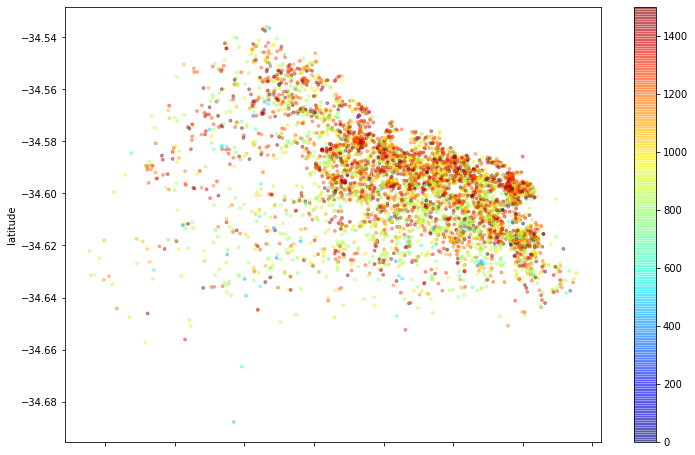

In [21]:
# Plotar os imóveis pela latitude-longitude
df_airbnb_clean_outliers.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, c = df_airbnb_clean_outliers['price'], s = 8,
                     cmap = plt.get_cmap('jet'), figsize = (12, 8));

## Conclusões

Foi realizada uma análise superficial na base de dados do Airbnb, mas pode-se observar que existem outliers em algumas variáveis.

A ausência de alguns dados podem fazer com o que o resultado da análise não seja tão favorável, pois quando analisamos que o Barrio do Retiro sendo uns dos alugueis mais caro de Buenos Aires, porém sabe-se que a localidade mais caro da Cidade Autonoma de Buenos Aires fica ao Norte da cidade com os seguintes Barrios, Palermo, Recoleta, Belgrano por exemplo e considerado Barrios Nobres.

Por fim, lembra-se que este dataset é uma versão resumida,ideal apenas para uma abordagem inicial.